## Apresentar um exemplo de relatório 'Horizontal Bar Chart'.

1 - Conectando com a base

In [1]:
#Importando os pacotes necessários para integrar o SQL com Python

from datetime import date
import time
import socket
import pandas as pd
import pymssql as sql
import warnings
warnings.filterwarnings("ignore")

In [7]:
#Cria a conexão com o SQL Server passando os parametros (Servidor, Usuário, Senha, Database)
conexao = sql.connect('servidor', 'usuario', 'senha', 'banco_dados')

# Chama a consulta ao banco de dados passando os parametros da conexao criada
Alertas_Enquadra = pd.read_sql_query("""select enq.cd_enquadramento, enq.nm_artigo, count(*) as qtd from dbo.tgr_alertas al
join dbo.tpr_enquadramento enq on al.cd_enquadramento = enq.cd_enquadramento
where cd_produto = 2 and al.cd_enquadramento in (13, 1, 10, 12, 4, 9) 
group by enq.cd_enquadramento,enq.nm_artigo
order by enq.cd_enquadramento""", conexao)

#Fecha conexão com banco de dados
conexao.close()

In [8]:
Alertas_Enquadra.head()

,cd_enquadramento,nm_artigo,qtd
0,1,2.1 D - Alto Número de Transações,11
1,4,2.4 D - Transações de Clientes PEPs,67
2,9,2.09 D - Transações em Corredor de Risco,123
3,10,2.10 M - Transações em Cidades de Fronteira,31
4,12,2.12 D - Transações em Paraisos Fiscais,51


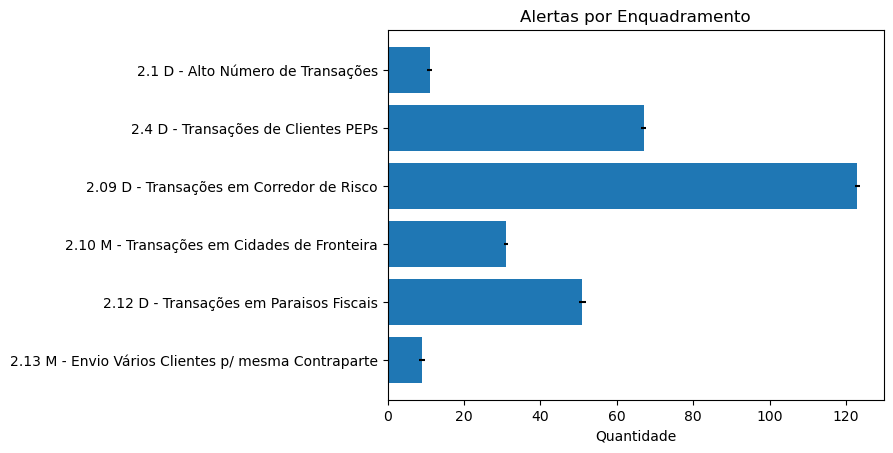

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)

fig, ax = plt.subplots()

# Example data
alertas = Alertas_Enquadra['nm_artigo']
y_pos = np.arange(len(alertas))
quantidade = Alertas_Enquadra['qtd'] #3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(alertas))

ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos, labels=alertas)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Quantidade')
ax.set_title('Alertas por Enquadramento')

plt.show()